# *CHATBOT- AI PROJECT*

-**_by PAVITHRA GOVARDHANAN and KEERTHI DHARAM_**

### Importing Packages 

In [1]:
#importing  packages
import numpy
import tensorflow
import random
import json
import pickle
import nltk
import tensorflow as tf


### Reading data from JSON File

In [2]:
from nltk.stem.lancaster import LancasterStemmer
word_stemmer = LancasterStemmer()

# Read training data from the json file
with open("training.json") as data:
    contents = json.load(data)

### Pre-Processing 

In [3]:
try:
    # load pre-processed data from the pickle file.
    with open("cache.pickle", "rb") as file:
        vocab, label, train, test = pickle.load(file)

except:

    
    vocab = []
    label = []
    x = []
    y = []

    # Extract words from the patterns, extract labels (tags)

    for i in contents["intents"]:
        for j in i["patterns"]:
        #Tokenization
            word_tokenized = nltk.word_tokenize(j) 
            vocab.extend(word_tokenized) 
            x.append(word_tokenized)
            y.append(i["tag"])

        if i["tag"] not in label:
            label.append(i["tag"])

    #Stemming

    vocab = [word_stemmer.stem(w.lower()) for w in vocab if w != "?"]
    vocab = sorted(list(set(vocab)))

    label = sorted(label)

    #BAG OF WORDS- One hot encoding
    train = []
    test = []

    output = [0 for _ in range(len(label))]

    for k, doc in enumerate(x):
        bag_words = []

        wrds = [word_stemmer.stem(w) for w in doc]

        for w in vocab:
            if w in wrds:
                bag_words.append(1)
            else:
                bag_words.append(0)

        line = output[:]
        line[label.index(y[k])] = 1

        train.append(bag_words)
        test.append(line)


    train= numpy.array(train)
    test = numpy.array(test)

    # Write the pre-processed data into the pickle file.
    with open("cache.pickle", "wb") as m:
        pickle.dump((vocab, label, train, test), m)



In [4]:

len(vocab)

507

### Bag of Words 

In [5]:
def bag_of_words(question, vocab):
    bagofwords = [0 for _ in range(len(vocab))]

    word = nltk.word_tokenize(question)
    word = [word_stemmer.stem(j.lower()) for j in word]

    for v in word:
        for i, w in enumerate(vocab):
            if v == w:
                bagofwords[i] = 1

    return numpy.array(bagofwords)


### Convolutional Neural Network (CNN) 

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
cnn_model = Sequential()
cnn_model.add(Embedding(507, 32, input_length=507))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size = 3))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(220,activation='softmax'))
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 507, 32)           16224     
_________________________________________________________________
conv1d (Conv1D)              (None, 503, 128)          20608     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 167, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 21376)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1068850   
_________________________________________________________________
dense_1 (Dense)              (None, 220)               11220     
Total params: 1,116,902
Trainable params: 1,116,902
Non-trainable params: 0
______________________________________________

In [8]:
cnn=cnn_model.fit(train, test, epochs=150,verbose = 2, batch_size=64,validation_split=0.1,shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 418 samples, validate on 47 samples
Epoch 1/150
418/418 - 1s - loss: 0.0291 - acc: 0.9955 - val_loss: 0.0291 - val_acc: 0.9955
Epoch 2/150
418/418 - 1s - loss: 0.0290 - acc: 0.9955 - val_loss: 0.0291 - val_acc: 0.9955
Epoch 3/150
418/418 - 1s - loss: 0.0290 - acc: 0.9955 - val_loss: 0.0293 - val_acc: 0.9955
Epoch 4/150
418/418 - 1s - loss: 0.0290 - acc: 0.9955 - val_loss: 0.0296 - val_acc: 0.9955
Epoch 5/150
418/418 - 1s - loss: 0.0289 - acc: 0.9955 - val_loss: 0.0302 - val_acc: 0.9955
Epoch 6/150
418/418 - 1s - loss: 0.0288 - acc: 0.9955 - val_loss: 0.0303 - val_acc: 0.9955
Epoch 7/150
418/418 - 1s - loss: 0.0287 - acc: 0.9955 - val_loss: 0.0311 - val_acc: 0.9955
Epoch 8/150
418/418 - 1s - loss: 0.0287 - acc: 0.9955 - val_loss: 0.0321 - val_acc: 0.9955
Epoch 9/150
418/418 - 1s - loss: 0.0285 - acc: 0.9955 - val_loss: 0.0325 - val_acc: 0.9955
Epoch 10/150
418/418 - 1s - loss: 0.0284 -

418/418 - 1s - loss: 1.7669e-04 - acc: 0.9999 - val_loss: 0.0804 - val_acc: 0.9917
Epoch 85/150
418/418 - 1s - loss: 2.1712e-04 - acc: 0.9999 - val_loss: 0.0807 - val_acc: 0.9918
Epoch 86/150
418/418 - 1s - loss: 1.7014e-04 - acc: 0.9999 - val_loss: 0.0805 - val_acc: 0.9920
Epoch 87/150
418/418 - 1s - loss: 1.7270e-04 - acc: 0.9999 - val_loss: 0.0806 - val_acc: 0.9919
Epoch 88/150
418/418 - 1s - loss: 1.6672e-04 - acc: 0.9999 - val_loss: 0.0805 - val_acc: 0.9917
Epoch 89/150
418/418 - 1s - loss: 1.8425e-04 - acc: 0.9999 - val_loss: 0.0808 - val_acc: 0.9919
Epoch 90/150
418/418 - 1s - loss: 1.6038e-04 - acc: 0.9999 - val_loss: 0.0812 - val_acc: 0.9917
Epoch 91/150
418/418 - 1s - loss: 1.7407e-04 - acc: 0.9999 - val_loss: 0.0811 - val_acc: 0.9919
Epoch 92/150
418/418 - 1s - loss: 1.7848e-04 - acc: 0.9999 - val_loss: 0.0803 - val_acc: 0.9922
Epoch 93/150
418/418 - 1s - loss: 2.2054e-04 - acc: 0.9999 - val_loss: 0.0804 - val_acc: 0.9919
Epoch 94/150
418/418 - 1s - loss: 1.9827e-04 - acc: 0

### Accuracy (CNN) 

In [9]:
print("Model saved successfully...")

scores = cnn_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

Model saved successfully...
465/465 [==============================] - 0s 545us/sample - loss: 0.0084 - acc: 0.9991
Accuracy: 0.9990616


### Graph results of CNN 

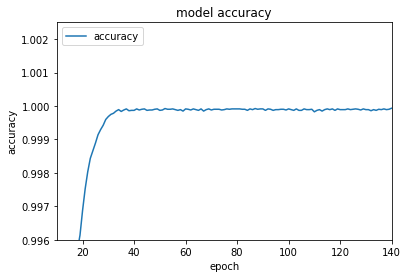

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnn.history['acc'])
plt.title('model accuracy')
plt.ylim(0.996,1.0025)
plt.xlim(10,140)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

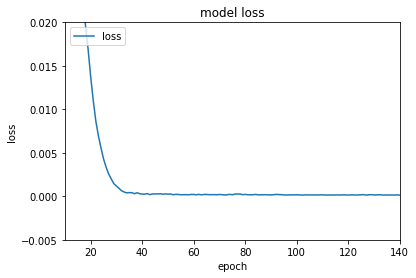

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnn.history['loss'])
plt.title('model loss')
plt.ylim(-0.005,0.02)
plt.xlim(10,140)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

### Chatting 

In [21]:
import pyttsx3
def chatbot():
    print("Start talking with the bot (type quit to stop)")

    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        # Prediction 
        results = cnn_model.predict([bag_of_words(inp, vocab).reshape(1,507)])

        # Choose the result with maximum probability
        max_prob = numpy.argmax(results)

        
        if results[0][max_prob] > 0.5:

            tags = label[int(max_prob)]
            responses = []
            for i in contents["intents"]:
                if i["tag"] == tags:
                    responses = i["responses"]

            answer=random.choice(responses)
            print(answer,"\n")
            x= pyttsx3.init()
            x.say(answer)
            x.runAndWait()
            
            

        else:

            print("I didn't get that. Try again.\n")
            x= pyttsx3.init()
            x.say("I didn't get that. Try again.")
            x.runAndWait()

chatbot()

Start talking with the bot (type quit to stop)
You: hi
Hello! 

You: os
Software that coordinates between the hardware and other parts of the computer to run other software is called an operating system, or the OS. 

You: bye
Talk to you later 

You: quit


### Recurrent Neural Network (RNN)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM,SimpleRNN
rnn_model = Sequential()
rnn_model.add(Embedding(507, 32, input_length=507))
rnn_model.add(SimpleRNN(128, activation='relu', return_sequences=True))
rnn_model.add(Flatten())
rnn_model.add(Dense(50, activation='relu'))
rnn_model.add(Dense(220,activation='softmax'))
rnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Using TensorFlow backend.


In [16]:
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 507, 32)           16224     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 507, 128)          20608     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64896)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3244850   
_________________________________________________________________
dense_2 (Dense)              (None, 220)               11220     
Total params: 3,292,902
Trainable params: 3,292,902
Non-trainable params: 0
_________________________________________________________________


In [17]:
rnn=rnn_model.fit(train, test, epochs=150,verbose = 2, batch_size=16,validation_split=0.1)




Train on 418 samples, validate on 47 samples
Epoch 1/150





 - 9s - loss: 5.4006 - acc: 0.0000e+00 - val_loss: 5.4784 - val_acc: 0.0000e+00
Epoch 2/150
 - 8s - loss: 5.3412 - acc: 0.0144 - val_loss: 5.8643 - val_acc: 0.0000e+00
Epoch 3/150
 - 8s - loss: 4.9207 - acc: 0.0431 - val_loss: 8.3212 - val_acc: 0.0000e+00
Epoch 4/150
 - 8s - loss: 3.5467 - acc: 0.2297 - val_loss: 12.7768 - val_acc: 0.0000e+00
Epoch 5/150
 - 9s - loss: 2.2519 - acc: 0.5072 - val_loss: 15.4167 - val_acc: 0.0000e+00
Epoch 6/150
 - 8s - loss: 1.6222 - acc: 0.6531 - val_loss: 15.7726 - val_acc: 0.0000e+00
Epoch 7/150
 - 8s - loss: 1.2873 - acc: 0.7225 - val_loss: 16.0242 - val_acc: 0.0000e+00
Epoch 8/150
 - 8s - loss: 1.0790 - acc: 0.7512 - val_loss: 16.0925 - val_acc: 0.0000e+00
Epoch 9/150
 - 8s - loss: 0.9773 - acc: 0.7775 - val_loss: 16.0243 - val_acc: 0.0000e+00
Epoch 10/150
 - 8s - loss: 0.8359 - acc: 0.7871 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 11/150
 - 8s - loss: 0.7766 - acc: 0.8206 - val_l

Epoch 74/150
 - 9s - loss: 0.1483 - acc: 0.9593 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 75/150
 - 9s - loss: 0.1463 - acc: 0.9617 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 76/150
 - 10s - loss: 0.1469 - acc: 0.9641 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 77/150
 - 9s - loss: 0.1459 - acc: 0.9593 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 78/150
 - 10s - loss: 0.1450 - acc: 0.9593 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 79/150
 - 8s - loss: 0.1459 - acc: 0.9569 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 80/150
 - 8s - loss: 0.1461 - acc: 0.9569 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 81/150
 - 8s - loss: 0.1445 - acc: 0.9641 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 82/150
 - 8s - loss: 0.1464 - acc: 0.9593 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 83/150
 - 8s - loss: 0.1449 - acc: 0.9617 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 84/150
 - 8s - loss: 0.1439 - acc: 0.9641 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 85

### Accuracy (RNN) 

In [18]:
print("Model saved successfully...")

scores = rnn_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

Model saved successfully...
465/465 [==============================] - 1s 3ms/step
Accuracy: 0.875268817204301


### Graph results of RNN 

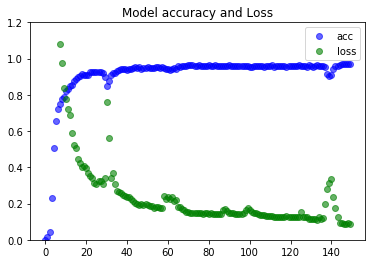

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

acc=rnn.history['acc']
loss=rnn.history['loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'bo', alpha = 0.6, label='acc')
plt.ylim(0,1.2)
plt.plot(epochs, loss,'go',alpha=0.6, label='loss')
plt.title('Model accuracy and Loss')
plt.legend()

### Chatting 

In [20]:
import pyttsx3
def rnn_chatbot():
    print("Start talking with the bot (type quit to stop)")

    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        # Prediction 
        results = cnn_model.predict([bag_of_words(inp, vocab).reshape(1,507)])

        # Choose the result with maximum probability
        max_prob = numpy.argmax(results)

        
        if results[0][max_prob] > 0.5:

            tags = label[int(max_prob)]
            responses = []
            for i in contents["intents"]:
                if i["tag"] == tags:
                    responses = i["responses"]

            answer=random.choice(responses)
            print(answer,"\n")
            x= pyttsx3.init()
            x.say(answer)
            x.runAndWait()
            
            

        else:

            print("I didn't get that. Try again.\n")
            x= pyttsx3.init()
            x.say("I didn't get that. Try again.")
            x.runAndWait()

rnn_chatbot()

Start talking with the bot (type quit to stop)
You: hi
Hi there, How can I help? 

You: what is your name
I'm Chatbot  

You: bye
See you buddy. 

You: what is a computer
An electronic device capable of performing calculations at very high speed and with very high accuracy. 

You: cord
The hole in the board shall be 6 inches in diameter. Its center shall be 9 inches from the top and 12 inches from each side of the board edges 

You: quit
